# Анализ гипотез

Для крупного интернет магазина проверяются гипотезы с целью увеличения выручки.
Задачи:
- Приоритизация гипотез
- A/B-тест
- Анализ результатов 

## Приоритизация гипотез

In [1]:
# импорт библиотек 
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import scipy.stats as stats
import warnings
import pylab
warnings.filterwarnings('ignore')
register_matplotlib_converters()

In [2]:
# чтение файла
try:
    data = pd.read_csv('/datasets/hypothesis.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')

In [3]:
pd.set_option('display.max_colwidth', None)# расширение колонок
data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
data.columns = data.columns.str.lower()# переименуем столбцы 

In [5]:
data['ICE'] = (data['impact']*data['confidence']/data['efforts']).round(2)# расчет ICE

In [6]:
data = data.sort_values(by='ICE', ascending=False)
data

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


In [7]:
data['RICE'] = data['reach']*data['impact']*data['confidence']/data['efforts'].round(2)# расчет RICE

In [8]:
data = data.sort_values(by='RICE', ascending=False)
data

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


**Вывод**

Согласно способу ICE наиболее приоритетной является гипотеза №8. Но согласно RICE эта гипотеза занимает лишь 5е место. 

На первом же месте гипотеза о добавлении формы подписки на все основные страницы. Приоритизация изменилась так как 7ая гипотеза затронет всех пользователей и поэтому имеет 10 баллов по этому критерию, в то время как восьмая гипотеза имеет только 1 балл, поскольку день рождения на период акции может быть далеко не у всех пользователей.

## Анализ A/B-теста

In [9]:
# чтение файлов
try:
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
    visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')

In [10]:
orders.sample(10)# рандомные 10 строк

,transactionId,visitorId,date,revenue,group
677,2348589867,1294878855,2019-08-09,27390,A
270,1731627062,1100237501,2019-08-18,290,B
892,69312188,1009464434,2019-08-21,11440,A
479,1651227034,2927087541,2019-08-24,2190,B
564,3649785329,1341752722,2019-08-26,990,B
465,1490093586,1404560065,2019-08-26,9934,B
1184,1329499668,2949041841,2019-08-14,10380,B
61,1251767592,2712142231,2019-08-16,790,B
584,1126146019,2705308997,2019-08-20,50,A
97,2012801741,414545763,2019-08-01,5555,B


In [11]:
visitors.sample(10)# рандомные 10 строк

,date,group,visitors
2,2019-08-03,A,507
12,2019-08-13,A,748
5,2019-08-06,A,667
8,2019-08-09,A,617
57,2019-08-27,B,720
1,2019-08-02,A,619
30,2019-08-31,A,699
61,2019-08-31,B,718
15,2019-08-16,A,361
50,2019-08-20,B,560


In [12]:
orders.info()# общая информация

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [13]:
visitors.info()# общая информация

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


### Предобработка данных

In [14]:
# переименуем столбцы 
orders.columns=['order_id','visitor_id','date','revenue','group']

In [15]:
orders['date'] = pd.to_datetime(orders['date'])# изменение типа данных
visitors['date'] = pd.to_datetime(visitors['date'])

In [16]:
visitors[visitors.duplicated()]# поиск дубликатов

,date,group,visitors


In [17]:
orders[orders.duplicated()]# поиск дубликатов

,order_id,visitor_id,date,revenue,group


In [18]:
qn_visitors = orders.pivot_table(index='visitor_id', values='group', aggfunc='nunique')
qn_visitors.query('group>1').count()# проверка наличия пользователей в 2х группах сразу

group    58
dtype: int64

In [19]:
orders.pivot_table(index='group', values='visitor_id', aggfunc='nunique')# расчет кол-ва пользователей в группах

,visitor_id
group,
A,503
B,586


**Вывод**

Датасеты не содержат пропусков и дубликатов. Для столбцов с датами - типы данных были изменены на соответствующие.
Но количество пользователей в  группах различается  более, чем на 1% и также есть клиенты, которые попали в 2 группы сразу.
В реальной практике необходимо бы было обратиться к коллегам по наладке системы тестирования и провести эксперимент заново.
В текущем случае проанализируем данные - как есть.

###  Кумулятивные метрики

In [20]:
# массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.\
apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'order_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1)\
.sort_values(by=['date','group']) 
# агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.\
apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].\
agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединение кумулятивные данных в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


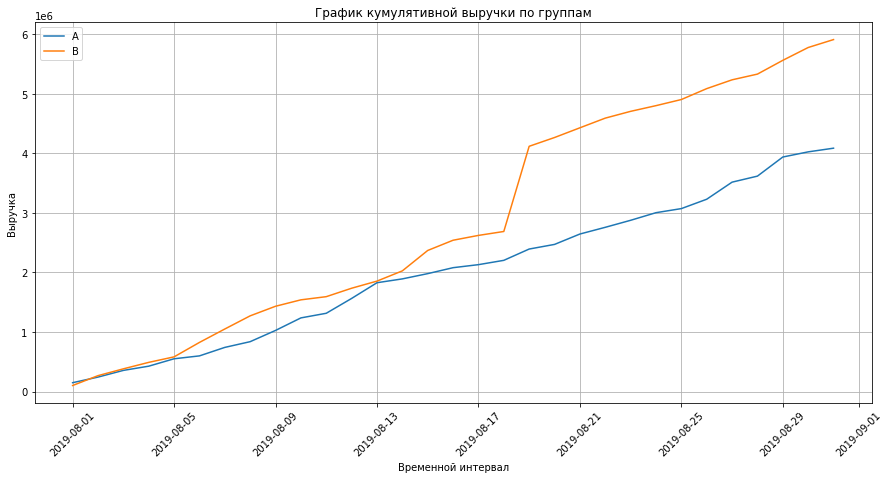

In [21]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
plt.figure(figsize=(15,7))
# график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')


plt.title('График кумулятивной выручки по группам')
plt.xlabel('Временной интервал')
plt.ylabel('Выручка')
plt.grid()
plt.xticks(rotation=45 )
plt.legend();

Выручка почти равномерно увеличивается в течение всего теста. 
Однако график выручки группы В резко растет в одной точке. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. У группы А также есть небольшой скачок. Необходимо будет проанализировать выбросы

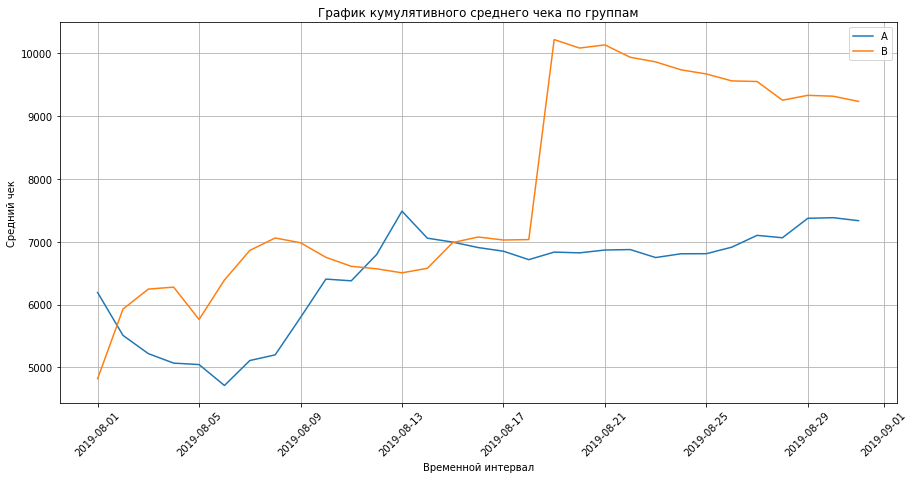

In [22]:
# графики среднего чека по группам
plt.figure(figsize=(15,7))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Временной интервал')
plt.ylabel('Средний чек')
plt.grid()
plt.xticks(rotation=45 )
plt.legend();

Средний чек тоже становится равномерным ближе к концу теста. Но есть большие всплески и падения в обеих группах в первой половине.  Возможно, нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

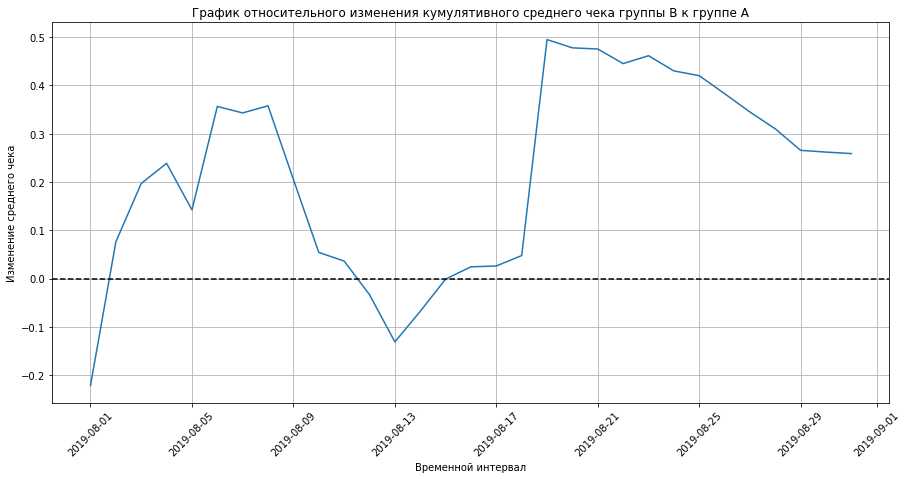

In [23]:
# сборка данных в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.\
merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15,7))
# отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'],\
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])\
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Временной интервал')
plt.ylabel('Изменение среднего чека')
plt.grid()
plt.xticks(rotation=45 );

В нескольких точках график различия между сегментами резко «скачет», что доказывает наличие выбросов. В основном средний чек группы В превышает чек группы А, но есть и одноразавое резкое падение.

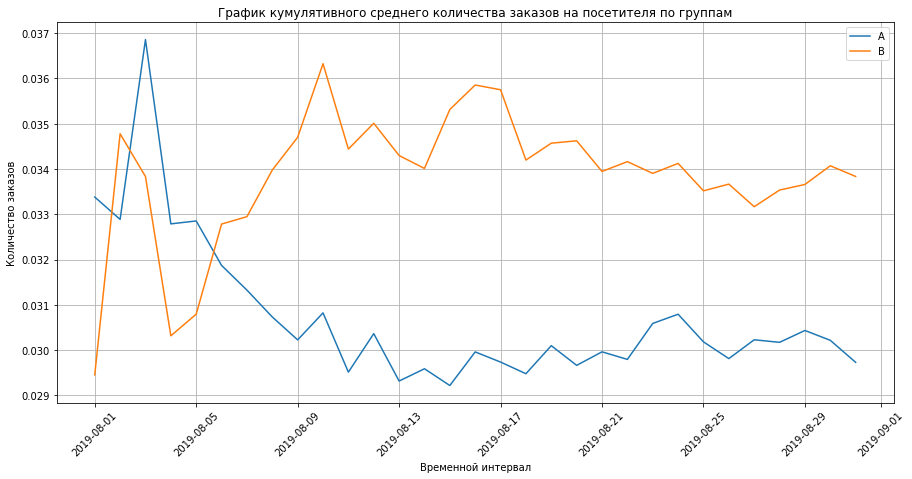

In [24]:
# кумулятивное количество заказов
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
plt.figure(figsize=(15,7))
#  графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Временной интервал')
plt.ylabel('Количество заказов')
plt.grid()
plt.xticks(rotation=45 )
plt.legend();

График симметричный. Группы колебались около одного значения, но затем количество заказов зафиксировалось. Количество заказов группы В превышает заказы группы А.

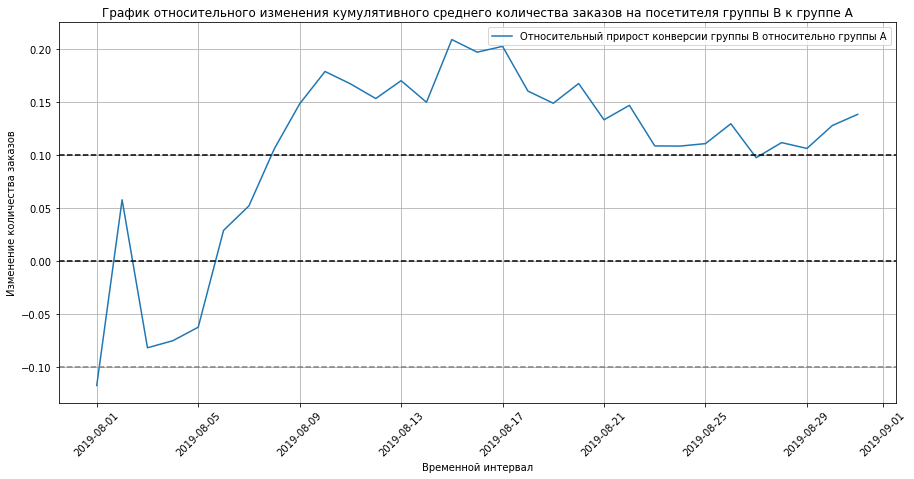

In [25]:
#  графики
mergedCumulativeConversions = cumulativeDataA[['date','conversion']]\
.merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
#  графики
plt.figure(figsize=(15,7))
plt.plot(mergedCumulativeConversions['date'], \
         mergedCumulativeConversions['conversionB']\
         /mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Временной интервал')
plt.ylabel('Изменение количества заказов')
plt.grid()
plt.xticks(rotation=45 )
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--');
plt.axhline(y=0.1, color='black', linestyle='--');

Количество заказов группы В почти на протяжении всего теста превышало количество заказов группы А более чем на 10%. В начале теста имелся большой спад.

### Анализ выбросов и всплесков

In [26]:
#количество заказов по пользователям
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'order_id': 'nunique'})
)
ordersByUsers

,visitor_id,order_id
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1
...,...,...
1026,4266935830,2
1027,4278982564,1
1028,4279090005,1
1029,4281247801,1


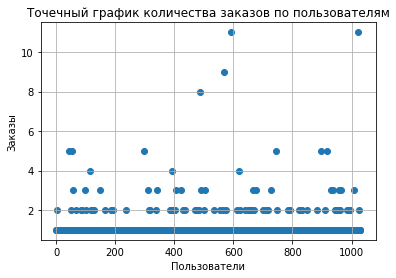

In [27]:
# точечная диаграмма числа заказов на одного пользователя
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['order_id'])
plt.xlabel('Пользователи')
plt.ylabel('Заказы')
plt.grid()
plt.title('Точечный график количества заказов по пользователям');

Согласно графику много пользователей с 2-4 заказами. Их точная доля не ясна — непонятно, считать их аномалиями или нет. 

In [28]:
# расчет перцентилей
np.percentile(ordersByUsers['order_id'], [95, 99])

array([2., 4.])

Не более 5% пользователей оформляли больше чем 2 заказа. И 1% пользователей заказывали более 4 раз. 

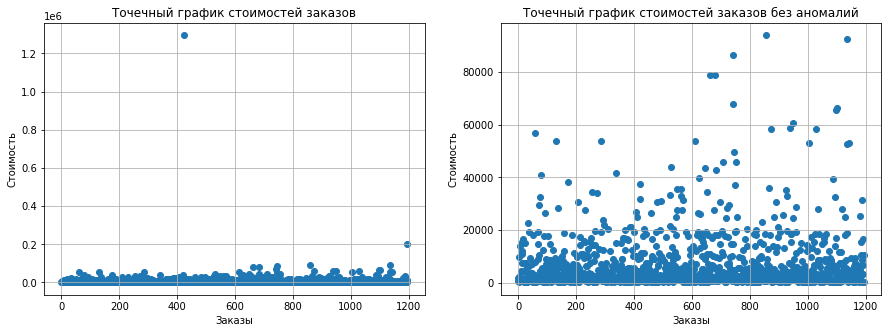

In [44]:
# точечная диаграмма стоимости заказов
plt.figure(figsize=(15, 5))
pylab.subplot (1, 2, 1)
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values,orders['revenue']) 
plt.xlabel('Заказы')
plt.ylabel('Стоимость')
plt.grid()
plt.title('Точечный график стоимостей заказов');
# точечная диаграмма стоимости заказов без выбросов
pylab.subplot (1, 2, 2)
x_values = pd.Series(range(0, len(orders['revenue'])-2))
plt.scatter(x_values, orders.query('revenue<=200000')['revenue']);
plt.xlabel('Заказы')
plt.ylabel('Стоимость')
plt.grid()
plt.title('Точечный график стоимостей заказов без аномалий');

В основном все заказы до 40 000 рублей. Есть выбросы в 200 тысяч и больше миллиона. 

In [30]:
# расчет перцентилей
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Не более у 5% заказов чек дороже 28 тысяч и только у 1% больше чем 58 тысяч.

В дальнейшем аналазие примем за аномальных пользователей тех, кто совершил от 2 заказов или совершил заказ дороже 28 000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и самыми дорогими заказами. 

### Статистическая значимость по «сырым» данным

***Гипотезы***

Нулевая: различий в среднем количестве заказов между группами нет.

Альтернативная: различия в среднем между группами есть.

In [31]:
# число совершённых заказов по пользователям
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'order_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'order_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders'] 

In [32]:
# количество посещений 
visitorsPerDate = visitors.pivot_table(index='date', columns='group', values='visitors', aggfunc=['sum']).reset_index()
visitorsPerDate.columns=['date','A','B']
visitorsPerDate.head()

,date,A,B
0,2019-08-01,719,713
1,2019-08-02,619,581
2,2019-08-03,507,509
3,2019-08-04,717,770
4,2019-08-05,756,707


In [33]:
# объединение последовательностей для определения числа заказов по пользователям
sampleA = pd.concat([ordersByUsersA['orders'],\
pd.Series(0, \
index=np.arange(visitorsPerDate['A'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],\
pd.Series(0, \
index=np.arange(visitorsPerDate['B'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0) 

In [34]:
# расчет критерия Манна-Уитни
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.017
0.138


Вывод: По «сырым» данным есть различия в среднем числе заказов групп A и B. 
Первое число — p-value = 0.017 меньше 0.05. Значит, нулевую гипотезу можно отвергнуть. 
Относительное превосходство группы B равно 13.8%.

***Гипотезы***

Нулевая гипотеза: различий в среднем чеке между группами нет. 

Альтернативная гипотеза: различия в среднем чеке между группами есть. 

In [35]:
# расчет критерия Манна-Уитни
print('{0:.3f}'.\
format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], \
                        orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.\
format(orders[orders['group']=='B']['revenue'].\
       mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.729
0.259


P-value значительно больше 0.05. Следовательно мы не можем  отвергнуть нулевую гипотезу и считать, что в среднем чеке есть различия. Cредний чек группы B выше среднего чека группы A на 25.9%, что свидетельствует о влиянии выбросов. 

Ранее приняли за аномальных пользователей тех, кто совершил от 2 заказов или совершил заказ дороже 28 000 рублей. 

In [36]:
# срезы пользователей с числом заказов больше 2 
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitor_id'],
    ],
    axis=0,
)

# и пользователей, совершивших заказы дороже 28 000
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
abnormalUsers.shape[0]

74

Всего 74 аномальных пользователя

In [37]:
# выборки количества заказов по пользователям по группам теста
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsPerDate['A'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsPerDate['B'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

In [38]:
#критерий Манна-Уитни
print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.013
0.173


p-value все также  меньше 0.05. Относительный выигрыш группы B стал 17.3%.

In [39]:
#критерий Манна-Уитни
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

0.738
-0.020


P-value увеличился, но и разница между сегментами сократилась с 25% до 2% в обратную сторону. Что еще раз наглядно демонстрирует влияние аномалий.

**Вывод**

Существует статистически значимое различие по среднему количеству заказов между группами и  по «сырым» и  по данным после фильтрации аномалий

Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий

Количество заказов группы B лучше группы A. .
Следовательно, тест следует остановить и признать победу группы В.
Внедрение изменений поможет увеличить количество заказов (при сохранении среднего чека), что приведет к росту выручки компании.
